<a href="https://colab.research.google.com/github/drpetros11111/TS_UD_Tr/blob/main/Section_5_Working_with_Time_Series_in_Python_Completed_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Relevant Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

# Import Python libraries commonly used for data analysis, time series analysis, and visualization:

-----------------------

    pandas (pd)
Used for data manipulation and analysis, especially with DataFrames.

------------
    numpy (np)
Used for numerical operations and working with arrays.

---------------------
    matplotlib.pyplot (plt)
A plotting library for creating static, interactive, and animated visualizations.

-----------------------
    statsmodels.graphics.tsaplots (sgt)

Provides functions for plotting time series analysis graphics, such as ACF and PACF plots.

--------------------
    statsmodels.tsa.stattools (sts)

Contains statistical tests and tools for time series analysis, like the Augmented Dickey-Fuller test for stationarity.

-----------------------------------
    statsmodels.tsa.seasonal.seasonal_decompose

A function for decomposing time series data into trend, seasonality, and residual components.

------------------------
    seaborn (sns)
A statistical data visualization library based on matplotlib, providing a high-level interface for drawing attractive statistical graphics.

-------------------
    sns.set()
Sets the aesthetic style of the plots to be generated by Seaborn.

### Loading and Transforming the Data

In [ ]:
raw_csv_data = pd.read_csv("/content/Index2018.csv")
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

/tmp/ipython-input-3988913709.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_comp=df_comp.fillna(method='ffill')


# Load a CSV file and prepares it for time series analysis:

-----------------
    raw_csv_data = pd.read_csv("/content/Index2018.csv")
Reads the data from the specified CSV file into a pandas DataFrame called raw_csv_data.

------------------
    df_comp = raw_csv_data.copy()
Creates a copy of the DataFrame and assigns it to df_comp. This is good practice to avoid modifying the original data.

-----------------------------
    df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
Converts the 'date' column to datetime objects. The dayfirst=True argument specifies that the date format in the CSV has the day before the month.

-----------------------------
    df_comp.set_index("date", inplace=True)
Sets the 'date' column as the index of the DataFrame. inplace=True modifies the DataFrame directly.

------------------------------
    df_comp = df_comp.asfreq('b')
Resamples the DataFrame to a business day frequency ('b'). This will add rows for missing business days.

-------------------
    df_comp = df_comp.fillna(method='ffill')
Fills any missing values (introduced by asfreq) using the forward-fill method. This means the last valid observation is used to fill the gaps.

The warning you see in the output FutureWarning

    DataFrame.fillna

with

    'method'

is deprecated and will raise in a future version.

----------------
Use obj.ffill() or obj.bfill() instead. indicates

that the way fillna is used with the method argument is deprecated. The recommended way is to use the dedicated ffill() or bfill() methods directly on the DataFrame.



### Removing Surplus Data

In [ ]:
df_comp['market_value']=df_comp.spx

In [ ]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

# iloc and loc are both ways to select data from a pandas DataFrame, but they use different methods for indexing

--------------------

##iloc (integer-location based indexing):
This method is used for selecting data by its integer position. You provide integer indices for the rows and columns you want to select.

It works similarly to standard Python list or NumPy array indexing.

--------------------------
##loc (label-based indexing)
This method is used for selecting data by its label (or index name). You provide the labels for the rows and columns you want to select.

This is particularly useful when your DataFrame has a meaningful index, such as dates or names.

-----------------------------
##Key Differences

Indexing Method: iloc uses integer positions, while loc uses labels (index names and column names).

##Slicing

When slicing with iloc, the end index is exclusive, just like in standard Python slicing. When slicing with loc, the end index is inclusive.

##Data Types
iloc expects integers or boolean arrays for indexing. loc expects labels (which can be various data types depending on your index and column names) or boolean arrays.

------------------------
In your code, df_comp.iloc[:size] uses iloc to select rows from the beginning up to (but not including) the integer position specified by size.

This is because you are splitting the DataFrame based on a calculated percentage of the total number of rows, which results in an integer index.

# White Noise

In time series analysis, **white noise** is a fundamental concept that represents a sequence of completely random data points. Think of it as pure, unpredictable randomness. A time series is considered white noise if it satisfies three key properties:

----------------------
### Key Properties

* **Zero Mean:**

The average value of the data points in the series is zero. The data fluctuates randomly around this central point.

* **Constant Variance:**

The spread or variability of the data points is consistent over time. There are no periods of high volatility followed by periods of low volatility. The "loudness" of the noise is constant.

* **Zero Autocorrelation:**

There is no relationship or correlation between data points at different times. The value at any given time is completely independent of its past or future values. In other words, knowing the value of a data point doesn't help you predict the value of any other data point in the series. This is the most crucial property.

***
------------------
### Why White Noise is Important

White noise is an extremely important concept in time series forecasting for two main reasons:

1.  **Model Diagnostics:**

When you build a time series forecasting model, the goal is to "explain" or capture all the patterns and dependencies in the data.

What's left over—the **residuals** (the difference between the actual values and the model's predictions)—should ideally be white noise. If your residuals are not white noise, it means your model has failed to capture some of the underlying patterns, and you can likely improve it.

2.  **Predictability:**

By definition, a white noise time series is entirely random and unpredictable. If your original time series is determined to be white noise, it means there's no pattern to model, and therefore, it cannot be forecasted.

The best prediction you can make for any future value is simply the mean of the series (which is zero for white noise).

***
----------------
### How to Check for White Noise

To determine if a time series or a set of model residuals is white noise, you can use a few diagnostic tools:

* **Line Plot:**

Visually inspect a plot of the data. Does it look like a random, "static" signal with no discernible trends or patterns?

* **Summary Statistics:**

Calculate the mean and variance to see if they are close to zero and constant over time.

* **Autocorrelation Plot (ACF):**

This is the most definitive test. An autocorrelation plot shows the correlation of the series with its lagged versions.

For a white noise series, you expect all the spikes in the ACF plot to be very close to zero and fall within the confidence intervals (usually represented by dashed lines).

Any significant spike outside these boundaries suggests that the series is not white noise.



In [ ]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

# This code generates a time series of "white noise".


This effectively creates a synthetic time series (wn) that has the same mean and standard deviation as your actual market value data, but with no underlying patterns or dependencies over time.

White noise is a random signal with a constant power spectral density, meaning it has equal power in any frequency band.

-----------------------
In this case, the code generates random numbers from a normal distribution:

    np.random.normal()

This is a NumPy function that generates random numbers from a normal (Gaussian) distribution.

--------------------
    loc = df.market_value.mean()

Sets the mean of the normal distribution to the mean of the market_value column in your DataFrame.

The code

    loc = df.market_value.mean()

does not create a column with the name 'loc' in your DataFrame.

In that line, loc is just the parameter name within the np.random.normal() function call. You are assigning the calculated mean of df.market_value to that parameter, which the function then uses to generate the random numbers for the white noise.

----------------------
    scale = df.market_value.std()
Sets the standard deviation of the normal distribution to the standard deviation of the market_value column in your DataFrame.

--------------------------
    size = len(df)

Specifies the number of random numbers to generate, which is equal to the number of rows in your DataFrame.

------------
This effectively creates a synthetic time series (wn) that has the same mean and standard deviation as your actual market value data, but with no underlying patterns or dependencies over time.

In [ ]:
df['wn'] = wn

/tmp/ipython-input-672873062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [ ]:
round(df.describe())

,market_value,wn
count,5021.0,5021.0
mean,1092.0,1090.0
std,293.0,289.0
min,439.0,165.0
25%,915.0,898.0
50%,1145.0,1090.0
75%,1316.0,1286.0
max,1570.0,2224.0


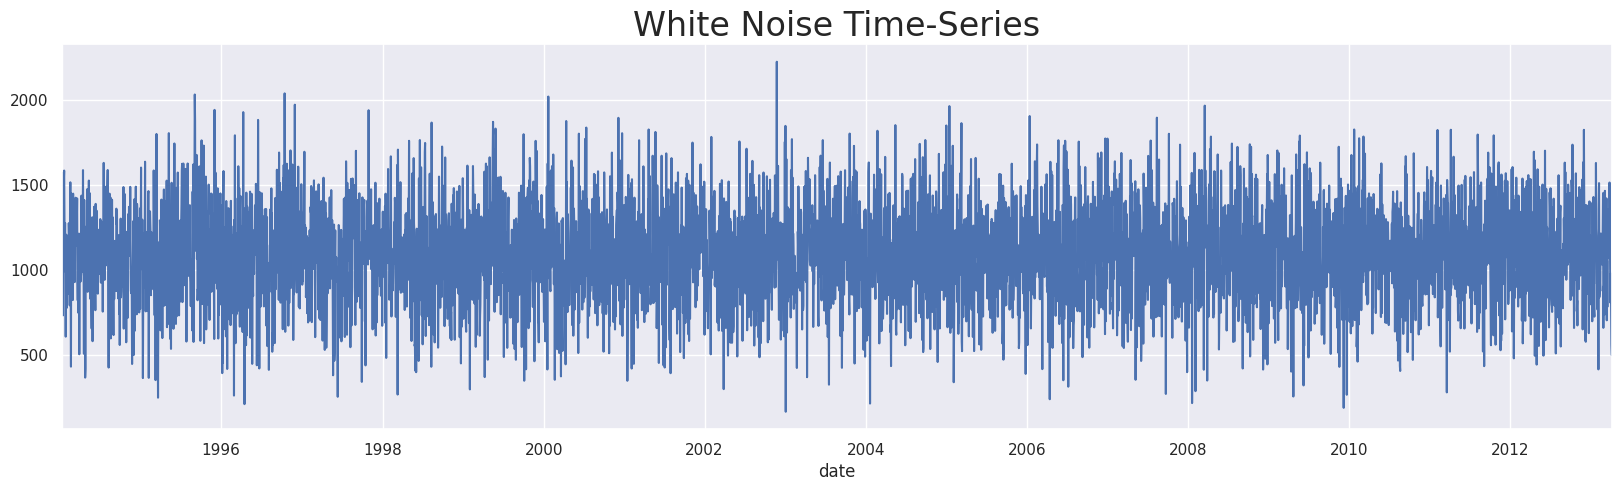

In [ ]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

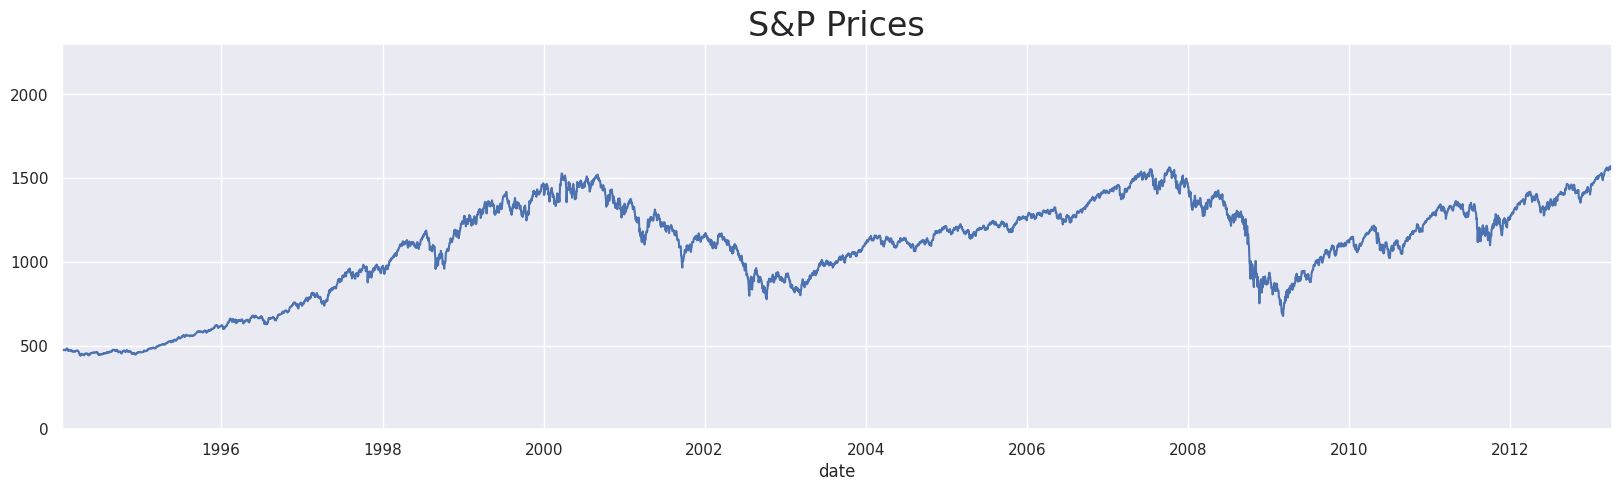

In [ ]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

#Random Walk
A **random walk** is a time series model where the value at the current time step is equal to the value at the previous time step plus a random, unpredictable "step" or shock.

Imagine a drunkard staggering down a street: their next position is their current position plus a random direction and distance. The path they trace out is a random walk.

A key characteristic of a random walk is that it is **non-stationary**. This means its statistical properties, such as the mean and variance, change over time. The variance of a random walk grows with each step, so the series becomes more spread out the longer it goes on.

-----------------------
## The Random Walk Formula

The standard formula for a random walk is:

$Y_t = Y_{t-1} + \epsilon_t$

Where:

* $Y_t$ is the value of the time series at time $t$.
* $Y_{t-1}$ is the value at the previous time step.
* $\epsilon_t$ is a **white noise** error term.

This formula highlights a crucial point: the best prediction for the next value ($Y_t$) is simply the last observed value ($Y_{t-1}$) because the error term is unpredictable.

---

### Random Walk with Drift

A common variation is the **random walk with drift**, which includes a constant term that represents a predictable trend over time.

$Y_t = \mu + Y_{t-1} + \epsilon_t$

Here, $\mu$ is the drift term, which can be thought of as the average step size. This model suggests that the series will trend upwards or downwards by a constant amount on average, in addition to the random fluctuations.

---

### Random Walk vs. White Noise

It's easy to confuse a random walk with white noise, but they are fundamentally different:

| Feature | Random Walk | White Noise |
| :--- | :--- | :--- |
| **Stationarity** | **Non-stationary**. The mean and variance change over time. | **Stationary**. The mean and variance are constant over time. |
| **Autocorrelation** | **Highly correlated**. The value at time $t$ is strongly correlated with its previous values. | **Zero autocorrelation**. There is no correlation between past and present values. |
| **Predictability** | Unpredictable, except for the fact that the next value will likely be close to the last one. | Completely unpredictable. Knowing a past value gives no information about the future. |
| **Relationship** | A random walk is the **cumulative sum** of a white noise series. | White noise is the **difference** between consecutive values of a random walk. |


In [ ]:
rw = pd.read_csv("/content/RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

/tmp/ipython-input-542343263.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw.price


In [ ]:
round(rw.describe(),1)

,price
count,5021.0
mean,1269.9
std,444.2
min,585.5
25%,931.6
50%,1156.4
75%,1488.4
max,2715.5


In [ ]:
df['rw'] = rw.price

/tmp/ipython-input-818302766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw.price


In [ ]:
round(df.head(), 2)

,market_value,wn,rw
date,,,
1994-01-07,469.90,1303.65,1122.14
1994-01-10,475.27,1374.11,1080.35
1994-01-11,474.13,1153.99,1082.10
1994-01-12,474.17,1010.47,1083.64
1994-01-13,472.47,731.99,1067.15


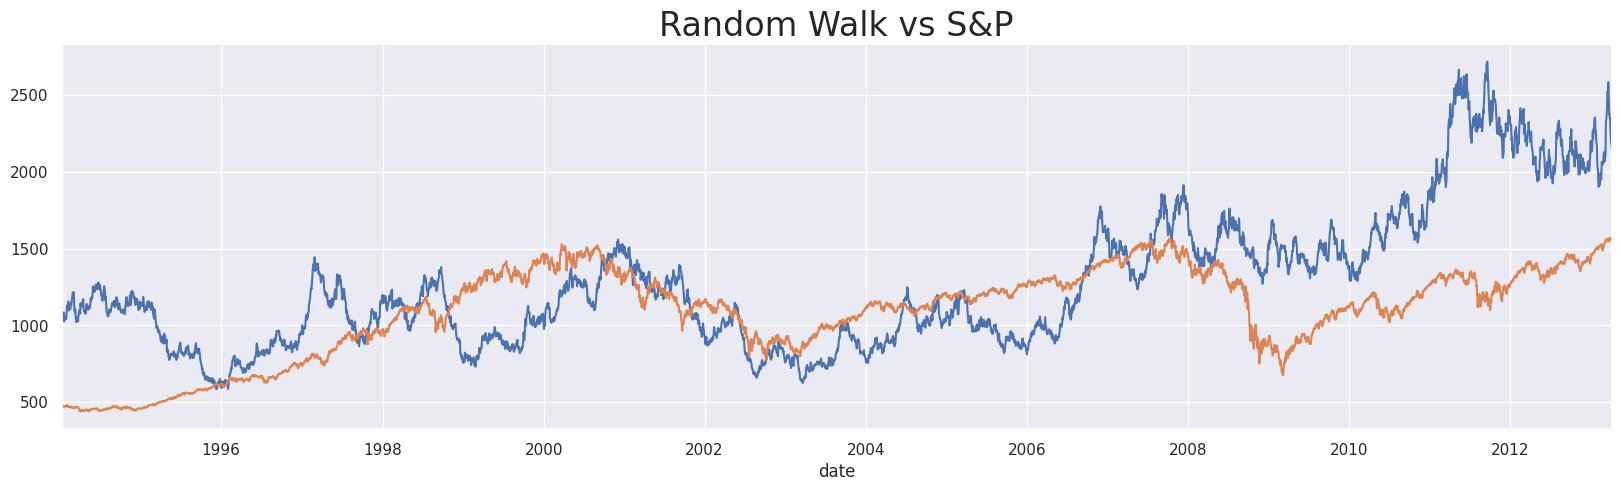

In [ ]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.show()

### Stationarity & Augmented Dickey-Fuller (ADF) test
The **Augmented Dickey-Fuller (ADF) test** is a statistical test used in time series analysis to determine if a series is **stationary** or **non-stationary**.

It's an enhanced version of the original Dickey-Fuller test, designed to handle more complex time series models that have autoregressive properties. The main goal of the test is to check for the presence of a **unit root**, which is a key indicator of non-stationarity.

---

### Hypotheses

The ADF test operates on a null hypothesis and an alternative hypothesis:

* **Null Hypothesis ($H_0$)**: The time series has a unit root, which means it is non-stationary.
* **Alternative Hypothesis ($H_a$)**: The time series does not have a unit root, which means it is stationary.

A stationary time series has statistical properties like its mean and variance that remain constant over time. This makes it easier to model and forecast.

Non-stationary series, like a random walk, have a time-dependent structure that makes them difficult to model directly.

When we say that the term $\delta_1\Delta y_{t-1}$ "absorbs the correlation," it means that this part of the equation accounts for the relationship between the current change in the time series ($\Delta y_t$) and the previous change ($\Delta y_{t-1}$).

This is important because, in many real-world series, the error term isn't a simple random shock; it might be partially predictable based on what happened right before it.

### Analogy: Forecasting a Car's Speed 🚗💨

Imagine you're trying to model a car's speed.

* **Simple Model (Dickey-Fuller):** Your basic model says the change in speed is a random shock.

    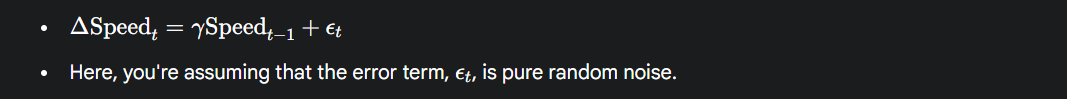

* **Reality:** In reality, the shock might not be completely random. A driver's acceleration or deceleration could carry over. For example, if they floored the gas pedal in the last second, they're likely still accelerating this second. This means the error term in your simple model is **autocorrelated**. It's not truly random because it depends on the previous error.


* **Augmented Model (ADF):** The ADF test adds a term to explicitly model this carryover.
   
   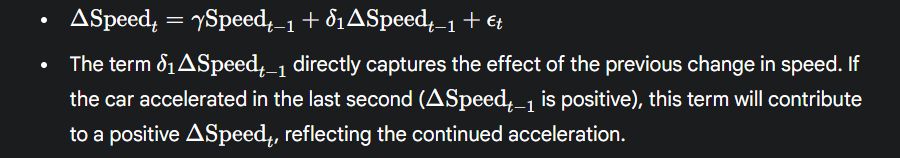

By including this term, the ADF model "absorbs" the predictable part of the error. What's left behind in the new error term, $\epsilon_t$, is much closer to pure white noise—the unpredictable, random part of the change in speed. This makes the test for a unit root reliable because it's no longer biased by the autocorrelation.


In the context of the Augmented Dickey-Fuller (ADF) test, $\gamma$ and $\delta$ are coefficients in the regression equation that have distinct meanings and purposes.

### $\gamma$ (Gamma)
$\gamma$ is the **main coefficient** of interest in the ADF test. It's the coefficient for the lagged level of the time series, $y_{t-1}$. The entire purpose of the test is to determine if this coefficient is significantly different from zero.

* **If $\gamma = 0$**, the equation simplifies to a random walk, indicating a **unit root** and **non-stationarity**.
* **If $\gamma < 0$**, the series tends to revert to its mean, indicating it is **stationary**. The more negative the value of $\gamma$, the faster the series reverts.

The key to understanding why a negative $\gamma$ causes a series to revert to its mean lies in the relationship between $\Delta y_t$ and $y_{t-1}$. Let's simplify the ADF equation to its core component for this explanation, ignoring the lagged differenced terms for a moment:

$\Delta y_t = \gamma y_{t-1} + \epsilon_t$

This equation tells us that the **change** in the time series at the current step ($\Delta y_t$) is influenced by its **level** in the previous step ($y_{t-1}$).

 ***

### $\delta$ (Delta)
$\delta$ is the coefficient for the lagged differenced terms, $\Delta y_{t-i}$. This is the "augmenting" part of the test. Its purpose is to account for any **autocorrelation** in the residuals.

* The term $\delta_1 \Delta y_{t-1}$ (and subsequent lagged terms) captures the relationship between the current change in the series and its past changes.
* By including these terms, the model ensures that the error term, $\epsilon_t$, is pure white noise. This makes the estimate of $\gamma$ more reliable and prevents the test from being biased by autocorrelation.

You're not typically interested in the specific value of $\delta$; its primary function is to make the test for $\gamma$ valid and robust.

***

### The Reversion Mechanism

1.  **Positive Value of $y_{t-1}$**: Let's say the time series is currently above its mean, so $y_{t-1}$ is a large positive number.
    * With a **negative** $\gamma$ coefficient, the term $\gamma y_{t-1}$ will be a large negative number.
    * This large negative number will cause a large negative change ($\Delta y_t$), pushing the current value ($y_t$) back down toward zero. The more positive $y_{t-1}$ is, the larger the negative push, causing a stronger reversion to the mean.

2.  **Negative Value of $y_{t-1}$**: Now, let's say the time series is below its mean, so $y_{t-1}$ is a large negative number.
    * With a **negative** $\gamma$ coefficient, the term $\gamma y_{t-1}$ will be a large positive number (negative times a negative).
    * This large positive number will cause a large positive change ($\Delta y_t$), pushing the current value ($y_t$) back up toward zero. The more negative $y_{t-1}$ is, the larger the positive push, again causing a stronger reversion to the mean.

In both cases, a negative $\gamma$ acts like a **restoring force**. It creates a feedback loop: when the series moves too far in one direction, the value of $\gamma y_{t-1}$ pushes it back towards the mean.

This behavior is the very definition of a stationary series—it fluctuates around a stable mean.

The magnitude of $\gamma$ determines the strength of this force. A very negative $\gamma$ means the restoring force is strong, and the series reverts to the mean quickly.

A $\gamma$ value close to zero means the force is weak, and the series reverts slowly. If $\gamma$ is exactly zero, there is no restoring force at all, and the series becomes a random walk, which doesn't revert to a mean.

The ADF test calculates a test statistic for $\gamma$ and a corresponding p-value to help you decide whether to reject the null hypothesis that $\gamma = 0$.

***

### $\delta$ (Delta)
$\delta$ is the coefficient for the lagged differenced terms, $\Delta y_{t-i}$. This is the "augmenting" part of the test.

Its purpose is to account for any **autocorrelation** in the residuals.

* The term $\delta_1 \Delta y_{t-1}$ (and subsequent lagged terms) captures the relationship between the current change in the series and its past changes.
* By including these terms, the model ensures that the error term, $\epsilon_t$, is pure white noise. This makes the estimate of $\gamma$ more reliable and prevents the test from being biased by autocorrelation.

You're not typically interested in the specific value of $\delta$; its primary function is to make the test for $\gamma$ valid and robust.

---

### How the Test Works

The ADF test expands on the basic Dickey-Fuller test by including lagged values of the differenced series in the regression equation. This allows the test to account for potential autocorrelation in the residuals, which can distort the results of the simpler test.

The test calculates a negative **ADF statistic**. The more negative this statistic is, the stronger the evidence against the null hypothesis (i.e., the more likely the series is stationary).

---

### Interpreting the Results

To interpret the results of an ADF test, you look at two key values: the **p-value** and the **test statistic** compared to **critical values**.

* **P-value**: This is the most common way to interpret the test.
    * If the **p-value is less than or equal to your chosen significance level** (e.g., 0.05), you **reject the null hypothesis**. This is good news: it means you can conclude that the series is stationary. 🥳
    * If the **p-value is greater than the significance level**, you **fail to reject the null hypothesis**. This suggests the series is non-stationary and likely requires differencing or other transformations to become stationary. 😩

* **Test Statistic vs. Critical Values**: The test also provides critical values at different significance levels (e.g., 1%, 5%, 10%).
    * If the **ADF statistic is more negative** than the critical value (e.g., -4.5 vs. -3.4 at 5% significance), you **reject the null hypothesis** and conclude the series is stationary.
    * If the **ADF statistic is less negative** than the critical value (e.g., -2.1 vs. -3.4 at 5% significance), you **fail to reject the null hypothesis** and conclude the series is non-stationary.

It's common for both the p-value and test statistic methods to lead to the same conclusion, but they offer two different ways to confirm the result.

In [ ]:
sts.adfuller(df.market_value)

(np.float64(-1.7369847452352447),
 np.float64(0.4121645696770616),
 18,
 5002,
 {'1%': np.float64(-3.431658008603046),
  '5%': np.float64(-2.862117998412982),
  '10%': np.float64(-2.567077669247375)},
 np.float64(39904.880607487445))

In [ ]:
sts.adfuller(df.wn)

(-69.20331416010461,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70746.80114417049)

In [ ]:
sts.adfuller(df.rw)

(-1.3286073927689723,
 0.6159849181617383,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

# Explaining the Output of the ADF

-----------------
###-1.3286073927689723: This is the ADF Test Statistic.

This value is compared to the critical values to determine if you can reject the null hypothesis of non-stationarity.

A more negative value provides stronger evidence against the null hypothesis.

-----------------

###0.6159849181617383: This is the p-value.
This is the probability of observing a test statistic as extreme as, or more extreme than, the one calculated, assuming the null hypothesis (non-stationarity) is true.

------------------
###A common threshold is 0.05.

If the p-value is less than or equal to 0.05, you reject the null hypothesis and conclude the series is stationary.

In this case, 0.6159 is much greater than 0.05, so you fail to reject the null hypothesis.

----------------------

###24
This is the number of lags used in the ADF regression. The test automatically determines the optimal number of lags to include to account for autocorrelation in the residuals.

--------------------
###4996
This is the number of observations used for the ADF regression. This is the length of the time series minus the number of lags used.

----------------------------
###Critical Values @
###{'1%': -3.4316595802782865,
###'5%': -2.8621186927706463,
###'10%': -2.567078038881065}

This is a dictionary containing the critical values for the test statistic at different significance levels:

'1%': The critical value at the 1% significance level.

'5%': The critical value at the 5% significance level.

'10%': The critical value at the 10% significance level.

To use these, you compare your ADF test statistic (-1.3286) to these values.

If the test statistic is more negative than the critical value at a given level, you reject the null hypothesis at that level. In this case, -1.3286 is not more negative than any of these critical values.

----------------------
###46299.333497595144: This is the Information Criterion value.

This value is used by the adfuller function to select the optimal number of lags for the test. You don't typically use this value for interpreting the test results themselves.

-----------------
##In summary,

based on the high p-value and the test statistic not being more negative than the critical values, the ADF test results indicate that the 'rw' time series is non-stationary.

#Seasonality

## Additive vs. Multiplicative Seasonal Decomposition

When you decompose a time series into its components (Trend, Seasonality, Residuals), you can use either an **additive** or a **multiplicative** model. The choice depends on how the seasonal variations relate to the level of the time series.

### Additive Decomposition

In an **additive** model, the components are **added** together to form the observed series:

$Y_t = T_t + S_t + R_t$

Where:
*   $Y_t$ is the observed value at time $t$.
*   $T_t$ is the trend component at time $t$.
*   $S_t$ is the seasonal component at time $t$.
*   $R_t$ is the residual (or irregular) component at time $t$.

This model assumes that the magnitude of the seasonal fluctuations **does not change** as the level of the time series changes. The seasonal pattern has a constant amplitude over time.

**When to use Additive:**
*   When the seasonal variations are roughly constant in size throughout the series.
*   When the time series data fluctuates around a relatively stable mean.

**Example:** Monthly sales of a product that consistently see a fixed increase every December, regardless of the overall sales volume.

### Multiplicative Decomposition

In a **multiplicative** model, the components are **multiplied** together to form the observed series:

$Y_t = T_t \times S_t \times R_t$

This model assumes that the magnitude of the seasonal fluctuations **changes proportionally** with the level of the time series. The seasonal pattern has an amplitude that increases or decreases as the trend increases or decreases.

Often, in a multiplicative model, the seasonal and residual components are expressed as **ratios** or **percentages** of the trend component.

**When to use Multiplicative:**
*   When the seasonal variations increase or decrease as the level of the time series increases or decreases.
*   Common in economic and financial time series where fluctuations are often a percentage of the value.

**Example:** Monthly revenue of a company where the holiday season boost is a larger dollar amount when overall revenue is high, but the percentage increase might be similar.

### How to choose:

Visually inspecting a plot of your time series can often help you decide.
*   If the seasonal swings look roughly the same size throughout the series, consider an additive model.
*   If the seasonal swings get larger as the series values increase (or smaller as they decrease), a multiplicative model is likely more appropriate.

In your previous decomposition of the S&P market value, using the multiplicative model was likely a good choice because financial time series often exhibit volatility that scales with the price level. Although the seasonal component in the S&P data was negligible, in series where seasonality exists and its magnitude changes with the level, the multiplicative model would capture this changing amplitude.

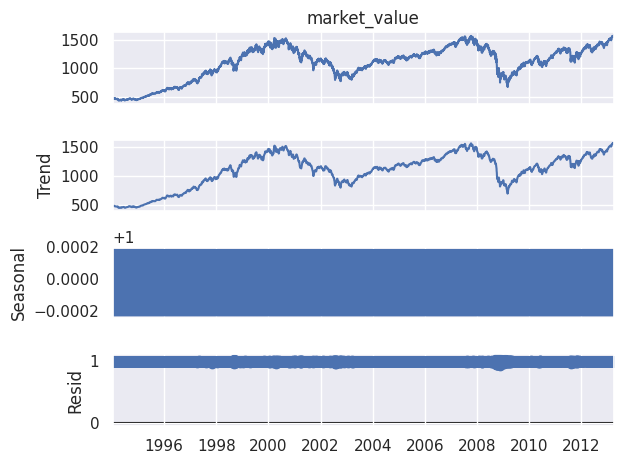

In [26]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

# Explanation of the Seasonal Decomposition
The plots you've provided show a **seasonal decomposition** of a time series, specifically the **market value**.

This is a technique that breaks down a time series into three fundamental components to better understand its underlying patterns: a trend, a seasonal component, and a residual.

***
---------------------------
### 1. Market Value (Original Series)
The top plot, labeled "market\_value," shows the original time series data.

It's the raw data we are trying to analyze.

You can see the market value generally increases over the period from 1996 to 2013, with some significant dips, such as the one around 2008, which is likely a reflection of the global financial crisis.

***

-----------------------
### 2. Trend
The second plot, "Trend," isolates the **long-term movement** in the data.

It smooths out the short-term fluctuations to show the overall direction of the series.

The trend line here clearly shows the general upward trajectory of the market value, despite the temporary downturns.

This component is what you would model if you were trying to predict the long-term growth of the market.

***
--------------------

### 3. Seasonal
The third plot, "Seasonal," captures any **recurring, fixed patterns** in the data.

These are fluctuations that repeat at a regular interval, such as daily, weekly, or yearly.

In this plot, the seasonal component is very small, fluctuating around zero.

This suggests that there isn't a significant seasonal pattern in this particular market value data.Based on your description, a solid blue parallelogram in a seasonal decomposition plot is not a standard output. A typical seasonal graph shows cyclical patterns as a wave or a fluctuating line. A solid parallelogram is likely a visual artifact or a simplified representation that is not intended to be interpreted as a traditional graph. It is most likely a stand-in for a flat line, which would indicate that there is no significant seasonal component in the data.

### Interpreting a Flat Seasonal Graph

If the seasonal graph were a **flat line** (which a parallelogram could be representing), here is how you would interpret it:

* **No Seasonal Pattern**: A flat line at or near zero means there is no recurring, fixed, or predictable pattern in the time series that repeats at a regular interval (e.g., daily, weekly, or yearly). The data does not consistently spike or dip during the same periods each year.
* **Irregular Fluctuations**: Any fluctuations in the original data are not due to a fixed seasonal effect. Instead, they are captured by the **trend** (long-term movement) or the **residual** (random, unpredictable noise) components of the decomposition.

In your previous example of the market value decomposition, the seasonal graph was also a flat line, indicating that the market value does not have a seasonal component. The fluctuations are driven by the trend and residual, not by a repeating calendar cycle.



***
-------------
### 4. Residual
The bottom plot, "Resid," shows the **random, unpredictable fluctuations** that remain after the trend and seasonal components have been removed.

This is the noise in the data that your model couldn't explain. Ideally, for a well-decomposed series, the residuals should resemble **white noise**—that is, they should be random and uncorrelated.

The fluctuations in this residual plot, particularly the large spikes and clustering of volatility around certain periods, suggest that the remaining noise might not be perfectly random.

This could indicate the presence of other patterns not captured by a simple trend-seasonal decomposition.

### ACF

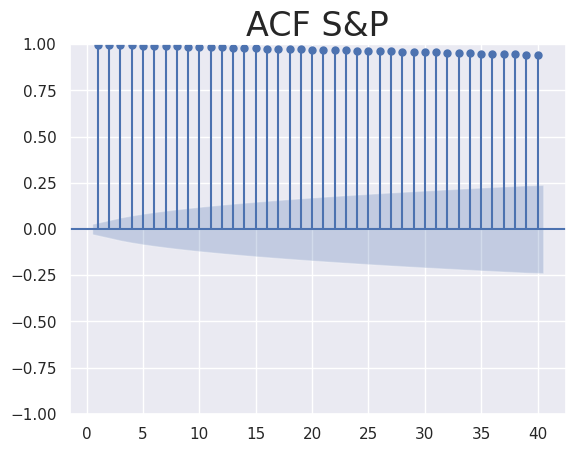

In [27]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

### PACF

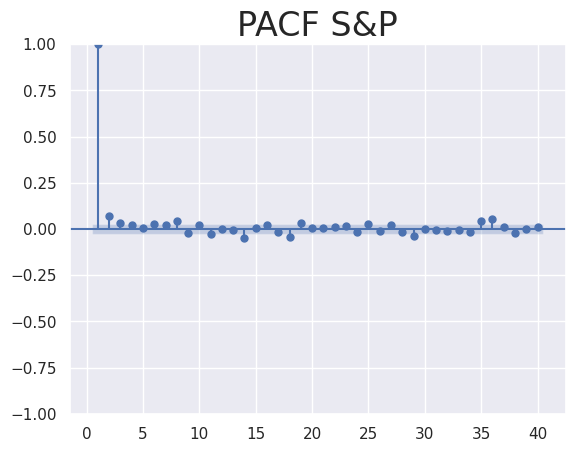

In [28]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

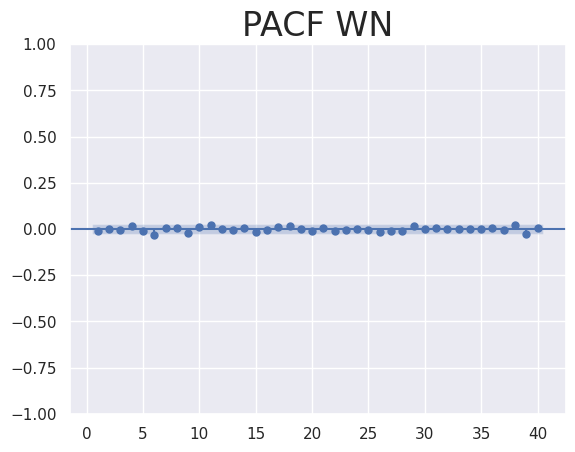

In [29]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()